# AM2061/AM6004: Assignment 2

## Submission

This assignment must be **your own work**. Remember the Plagiarism Policy that you agreed to (near the top of the 2022-AM2061-AM6004 Modules page on Canvas).

Please submit your assignment electronically:
- Save the notebook (*studentID*_A2.ipynb).
- Upload the notebook to the Assignment 2 submission on Canvas.

**If you submit this assignment in late or to the wrong location, a mark of zero will be recorded unless you make a case for mitigation by submitting supporting documentation (e.g. medical certificates) to the School of Mathematical Sciences Office <sms@ucc.ie>.**


Note: 
- For this assignment you should only ever import math, NumPy and Matplotlib. 
- For these exercises, it is not necessary, but might help you, to plot relevant functions using Matplotlib. 
- Be sure to provide comments for crucial lines of code stating their function.

Before you submit this assignment, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student ID below:

In [ ]:
NAME = "Patrick Falvey"
ID = "113384116"

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Question 1: Gauss-Seidel Method (5 marks)

(a) Create a Python function called `GaussSeidel` that solves a system of linear equations. You may assume that no row exchanges are required. Print the approximate error at each iteration using the $L_2$ norm. Let the initial guess be a zero vector. The function should return the solution as an array `x`.

In [11]:
def GaussSeidel(A, b, TOL, N):
    '''Gauss-Seidel method for systems of linear equations 
          
    Parameters
    ----------
    A: nxn matrix
    b: vector of right-hand side
    TOL: tolerance
    N: maximum number of iterations
    
    Returns
    -------
    x : approximate solution to Ax = b or 'Maximum number of iterations exceeded'

    Usage 
    -----------------------------------
    >>> GaussSeidel(A, b, TOL, N, x0)
    '''
    ### BEGIN SOLUTION

    x = np.zeros_like(b, dtype=np.double)
    
    print("Iteration {0}: {1}".format(0, x)) #Print the iteration Number and the corresponfing output
    
    #Iterate
    for k in range(1,N):
        
        x_old  = x.copy()  #Returns a copy of the given object x
        
        #print("Iteration {0}: {1}".format(k, x)) #Print the iteration Number and the corresponfing output
        
        #Loop over rows
        for i in range(A.shape[0]):
            
            s1 = np.dot(A[i,:i], x[:i])
            s2 = np.dot(A[i,(i+1):], x_old[(i+1):])
            x[i] = (b[i] - s1 - s2) / A[i ,i]
        
        L2 = np.linalg.norm(x - x_old) / np.linalg.norm(x)
        print("Iteration {0}: {1}:  {2}".format(k, x, L2)) #Print the iteration Number, the corresponding output and the approximate solution of each error
         
        #Stop condition 
        if L2 < TOL: #If error is less than the set tolerance
            print("solution found: The procedure was successful.") 
            return x
                        
    print("Gauss-Seide method failed after N0 iterations! No convergence!")      
    
    ### END SOLUTION

(b) Apply the Gauss-Seidel method to the cases below using a tolerance of $10^{-8}$ and a maximum number of $30$ iterations.

In [12]:
TOL = 1e-8 #tolerence
N =  30 #max number of iterations

Case A:
\begin{equation}
 \left(
 \begin{array}{cccc}
  8 & 1 & 1 & 3 \\
  5 & 8 & 0 & 2 \\
  3 & 2 & 8 & 1 \\
  4 & 1 & 0 & 8 \\
  \end{array}
 \right)
 \left(
 \begin{array}{c}
  x_1 \\
  x_2 \\
  x_3 \\
  x_4
 \end{array}
 \right)
 =
 \left(
 \begin{array}{c}
  -10 \\
  -2 \\
  -1 \\
  -5
 \end{array}
 \right)
\end{equation}

In [13]:
#Create the corresponding matrix
A = np.array([[8,1,1,3],
             [5,8,0,2],
             [3,2,8,1],
             [4,1,0,8]])

#Create the Solution Vector
b =  np.array([-10,-2,-1,-5])

#Run the model
GaussSeidel(A, b, TOL, N)

Iteration 0: [0. 0. 0. 0.]
Iteration 1: [-1.25        0.53125     0.2109375  -0.06640625]:  1.0
Iteration 2: [-1.31787109  0.590271    0.22993469 -0.03984833]:  0.06541608963853272
Iteration 3: [-1.33758259  0.5959512   0.23258671 -0.03070261]:  0.01525007176392442
Iteration 4: [-1.34205376  0.59645925  0.23299317 -0.02853053]:  0.0033707720496755564
Iteration 5: [-1.34298261  0.59649676  0.2330606  -0.02807079]:  0.0006983685185148499
Iteration 6: [-1.34316812  0.59649778  0.23307245 -0.02797816]:  0.00013955498151800922
Iteration 7: [-1.34320447  0.59649733  0.23307461 -0.02795993]:  2.735915835478084e-05
Iteration 8: [-1.34321152  0.59649718  0.23307502 -0.02795639]:  5.309658033615057e-06
Iteration 9: [-1.34321288  0.59649715  0.23307509 -0.0279557 ]:  1.0249275299587826e-06
Iteration 10: [-1.34321314  0.59649714  0.23307511 -0.02795557]:  1.972746588465377e-07
Iteration 11: [-1.34321319  0.59649714  0.23307511 -0.02795555]:  3.7912360567830246e-08
Iteration 12: [-1.3432132   0.596

array([-1.3432132 ,  0.59649714,  0.23307511, -0.02795554])

Case B:
\begin{equation}
 \left(
 \begin{array}{ccc}
  2 & 1 & 1 \\
  2 & 4 & 1 \\
  -3 & 1 & -4 \\
  \end{array}
 \right)
 \left(
 \begin{array}{c}
  x_1 \\
  x_2 \\
  x_3
 \end{array}
 \right)
 =
 \left(
 \begin{array}{c}
  0 \\
  3 \\
  -1
 \end{array}
 \right)
\end{equation}

In [14]:
#Create the corresponding matrix
A = np.array([[2,1,1],
             [2,4,1],
             [-3,1,-4]])

#Create the Solution Vector
b =  np.array([0,3,-1])

#Run the model
GaussSeidel(A, b, TOL, N)

Iteration 0: [0. 0. 0.]
Iteration 1: [0.     0.75   0.4375]:  1.0
Iteration 2: [-0.59375    0.9375     0.9296875]:  0.548251356365693
Iteration 3: [-0.93359375  0.984375    1.19628906]:  0.24020213750296793
Iteration 4: [-1.09033203  0.99609375  1.31677246]:  0.10009102450094513
Iteration 5: [-1.15643311  0.99902344  1.36708069]:  0.04053744591789755
Iteration 6: [-1.18305206  0.99975586  1.38722801]:  0.01605914107669381
Iteration 7: [-1.19349194  0.99993896  1.39510369]:  0.006255921529573668
Iteration 8: [-1.19752133  0.99998474  1.39813718]:  0.002407610982063807
Iteration 9: [-1.19906096  0.99999619  1.39929477]:  0.000918766288259083
Iteration 10: [-1.19964548  0.99999905  1.39973387]:  0.00034859129131612675
Iteration 11: [-1.19986646  0.99999976  1.39989978]:  0.00013174642619531615
Iteration 12: [-1.19994977  0.99999994  1.39996231]:  4.9662713805221473e-05
Iteration 13: [-1.19998113  0.99999999  1.39998584]:  1.8688203773100093e-05
Iteration 14: [-1.19999291  1.          1.39

array([-1.19999999,  1.        ,  1.39999999])

Case C:
\begin{equation}
 \left(
 \begin{array}{ccc}
  2 & -2 & 1 \\
  1 & 2 & 1 \\
  2 & -4 & 1 \\
  \end{array}
 \right)
 \left(
 \begin{array}{c}
  x_1 \\
  x_2 \\
  x_3
 \end{array}
 \right)
 =
 \left(
 \begin{array}{c}
  0 \\
  1 \\
  -1
 \end{array}
 \right)
\end{equation}

In [15]:
#Create the corresponding matrix
A = np.array([[2,-2,1],
             [1,2,1],
             [2,-4,1]])

#Create the Solution Vector
b =  np.array([0,1,-1])

#Run the model
GaussSeidel(A, b, TOL, N)

Iteration 0: [0. 0. 0.]
Iteration 1: [0.  0.5 1. ]:  1.0
Iteration 2: [ 0.  0. -1.]:  2.0615528128088303
Iteration 3: [0.5  0.75 1.  ]:  1.6294699794083671
Iteration 4: [ 0.25  -0.125 -2.   ]:  1.5524051294116996
Iteration 5: [0.875  1.0625 1.5   ]:  1.8412490126228036
Iteration 6: [ 0.3125  -0.40625 -3.25   ]:  1.5207777608002757
Iteration 7: [1.21875  1.515625 2.625   ]:  1.9123040877642545
Iteration 8: [ 0.203125  -0.9140625 -5.0625   ]:  1.5783725876573267
Iteration 9: [1.6171875  2.22265625 4.65625   ]:  1.9067401395857637
Iteration 10: [-0.10546875 -1.77539062 -7.890625  ]:  1.6419031908384811
Iteration 11: [2.16992188 3.36035156 8.1015625 ]:  1.875987269075918
Iteration 12: [ -0.69042969  -3.20556641 -12.44140625]:  1.6909022694395681
Iteration 13: [ 3.01513672  5.21313477 13.82226562]:  1.8456836255349307
Iteration 14: [ -1.69799805  -5.56213379 -19.85253906]:  1.724263014780542
Iteration 15: [ 4.36413574  8.24420166 23.24853516]:  1.8228491952580512
Iteration 16: [ -3.38006592

(c) Did the method converge to a solution for the cases as expected? Explain what you observe for Cases A-C.

Case C: Is not diagonally dominant which is important for convergance to occur with the use for the GaussSeidel method. The Gauss-Seidel method converges if the number of roots inside the unit circle is equal to the order of the iteration matrix.

## Question 2: Lagrange interpolation (5 marks)

(a) Write a Python function called `InterpolateLagrange` that finds an approximation based on the $n^{\text{th}}$ Lagrange interpolating polynomial of $n+1$ data points. It should take the $x$ and $y$ values of the data points as inputs, as well as the $x$ value of the desired approximation. It should then return the corresponding approximation of the $y$ value.

In [2]:
def InterpolateLagrange(x, y, xval):
    '''
    usage: InterpolateLagrange(x, y)
        x: array of x-values
        y: array of y-values
           e.g.: x = np.array([0, 0.5, 1, 1.5, 2]), y = np.array([1, 1.2, 1.4, 1.7, 2.2])
        xval: x-value, for which the y-value should be obtained
           e.g.: xval = 1.25
    output: 
        yval: y-value
    '''
    
    ### BEGIN SOLUTION

    n = len(x)
    # Initialise yval, which will be a summation
    yval = 0.0
    
    for i in range(n):
        term_i = 1.0 # For the products in L_(n,i) we initialise termi to 1.
        for j in range(n):
            if (j != i):
                term_i = term_i * (xval - x[j]) / (x[i] - x[j])
        yval = yval + term_i * y[i] # Add to Lagrange interpolating polynomial 
    return yval
    
    ### END SOLUTION

(b) Use `InterpolateLagrange` to plot the $n^{\text{th}}$ Lagrange interpolating polynomial for the function
\begin{equation}
f(x) = \exp{\left(-\frac{1}{2}x^2\right)}
\end{equation}
over the interval $x\in[-10,10]$ for $n=4$, $8$, $20$ and $40$. Use evenly spaced points in $x$.

In [3]:
def f(x):
    return np.exp((-1/2)*x**2)

In [4]:
n=4
new_x = np.linspace(-10,10,n)
new_x

array([-10.        ,  -3.33333333,   3.33333333,  10.        ])

In [5]:
def Interpolate(n):

    x = np.linspace(-10,10,n) # generate n x equally spaced values between -10 and 10
    y = f(x)                  # generate y values for each value of x

    new_x = np.linspace(-10,10,100) #generate 100 equally spaced values between -10 and 10
    new_y = new_x.copy()            #Returns a copy of the given object new_x

    for i in range(len(new_x)):     
        new_y[i] = InterpolateLagrange(x,y,new_x[i]) #Generate values for new_y for each value of new_x that pass through our values for x and y.
    
    # Plot function 
    plt.plot(new_x,new_y,'-')
    plt.plot(x,y,'ro')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.grid(True)    

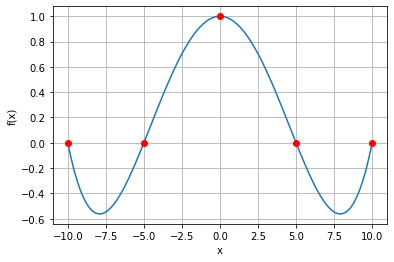

In [6]:
# n=4

n = 4

Interpolate(n +1 )

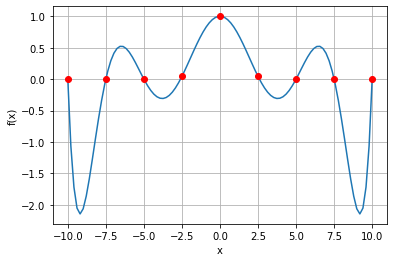

In [7]:
# n=8

n = 8

Interpolate(n+1)

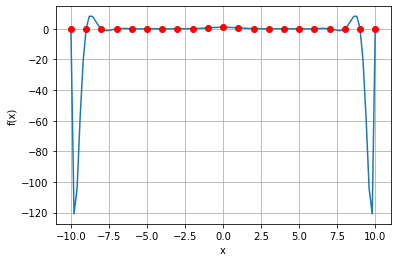

In [8]:
# n=20

n = 20

Interpolate(n+1)  

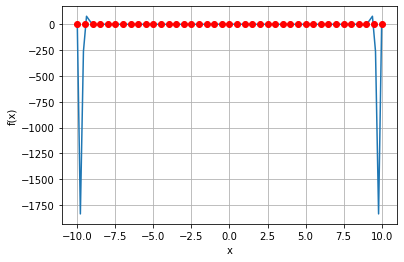

In [9]:
# n=40

n = 40

Interpolate(n+1)  

(c) Provide the first three derivatives of $f(x)$ (no working required) and plot them over the interval $[-10,10]$.

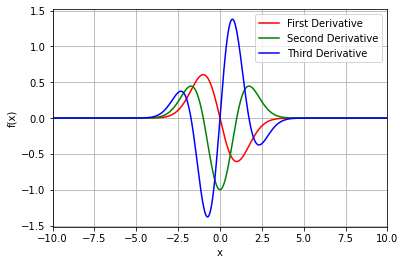

In [10]:
# First three derivatives of f(x)

def d1(x):
    return -x*np.exp((-1/2)*x**2)

def d2(x):
    return ((x**2)-1)*np.exp((-1/2)*x**2)

def d3(x):
    return (-x)*((x**2)-3)*np.exp((-1/2)*x**2)


# PLot each of the First three derivatives of f(x)

x = np.linspace(-10,10,1000)
y1 = d1(x)
y2 = d2(x)
y3 = d3(x)

plt.plot(x,y1, 'r', label = 'First Derivative')
plt.plot(x,y2, 'g', label = 'Second Derivative')
plt.plot(x,y3, 'b', label = 'Third Derivative')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(-10,10)
plt.grid(True)
plt.legend()

(d) Describe what you observe above for the Lagrange interpolating polynomials of increasing $n$ and explain how the derivatives of $f(x)$ may contribute to this.

What can be seen in the figures above for n = 4, 8, 20, 40, is an example of interpolation divergance for a set of Lagrange polynomials. 

Lagrange and other interpolation at equally spaced points, as in the example above, yield a polynomial oscillating above and below the true function. This behaviour tends to grow with the number of points, leading to a divergence known as Runge's phenomenon.

**Runge's phenomenon** is a problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation points. 

Runge's phenomenon is the consequence of two properties of this problem. 
The magnitude of the n-th order derivatives of this particular function grows quickly when n increases. The equidistance between points leads to a Lebesgue constant that increases quickly when n increases.

The phenomenon is graphically obvious because both properties combine to increase the magnitude of the oscillations. 